# THE SPARKS FOUNDATION

## GRIP MARCH 22(Data science and Business analytics)

## Task 1 - Prediction using Supervised Machine Learning

### AUTHOR - RAGHUVARAN

### OBJECTIVE:
* To predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#### SIMPLE LINEAR REGRESSION

**Importing necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [2]:
# Reading data from url link

df = pd.read_csv('http://bit.ly/w-data')

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Understanding the Dataset

### Data Dimension

In [3]:
df.shape

(25, 2)

**We can see the dataframe has 13 columns and 15000 observations.**

### Data Definition

In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

**Hours:** Number of hours students studied (Numeric)

**Scores:** Scores obtained by students (Numeric)

### Summary Statistics

In [5]:
# descriptive statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Inference:**
* The average studying hours of students is **5 hours/day** and their average score is **51**(Average).
* Students who are studying atleast **1 hour/day** and their average score is **17**(Minimum).
* At maximum ,Students are studying **9.2 hours/day** and their score is **95**(Maximum).

## Checking for missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**We can infer that there are no null column.**
**There is no missing values in our dataset.**

## Checking for Outliers

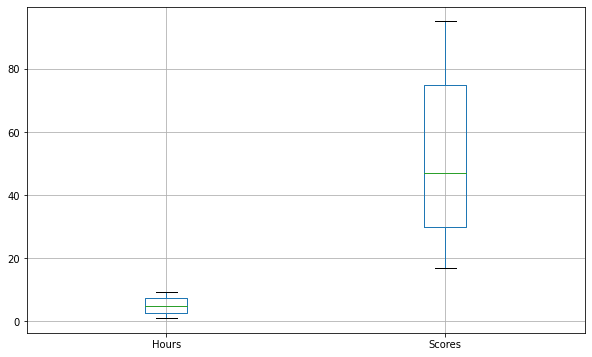

In [8]:
plt.rcParams['figure.figsize']=(10,6)

df.boxplot()

plt.show()

**There is no outliers or extreme observations present in the dataset**

## Checking for Correlation

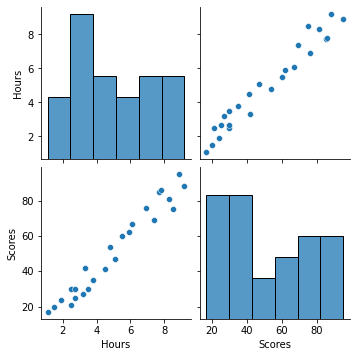

In [9]:
sns.pairplot(df);

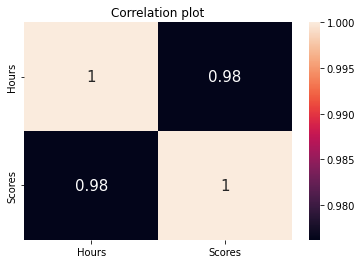

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot = True,annot_kws={"size": 15})
plt.title('Correlation plot')
plt.show()

**We can infer that there is high positive correlation between these two variables**


### Distribution Plots

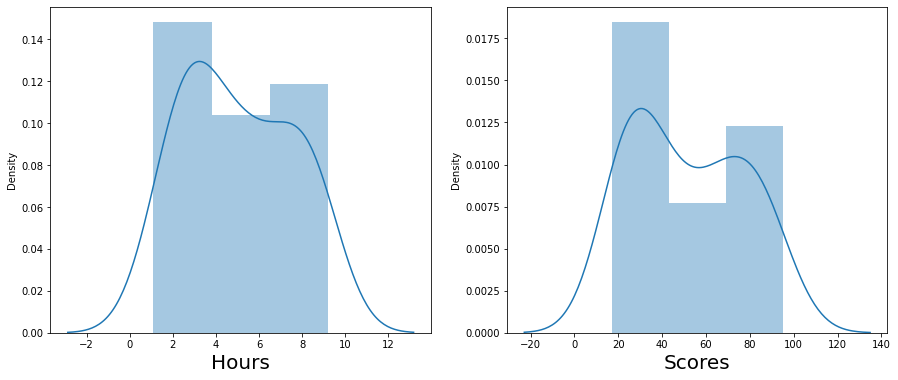

In [11]:
fig,ax = plt.subplots(1,2,figsize=(15,6))

for var,ax in zip(df.columns,ax.flatten()):
    z = sns.distplot(df[var],ax=ax)
    z.set_xlabel(var,fontsize=20)
        

In [12]:
# skewness
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

**We can infer that those variables follows near normal distribution**

### Train Test Split

In [13]:
X = df.iloc[:,:1]
y = df['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (17, 1)
X_test shape: (8, 1)
y_train shape: (17,)
y_test shape: (8,)


## Model Building 

In [14]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Model Parameters

In [15]:
print('Intercept:',model.intercept_)
print('Beta coefficient:', model.coef_)

Intercept: 2.794196676599803
Beta coefficient: [9.71054094]


## Plotting Regression Line

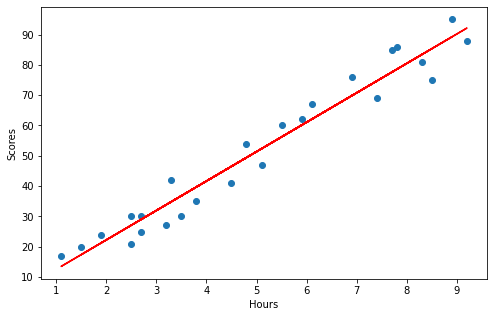

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(X,y)
plt.xlabel("Hours")
plt.ylabel("Scores")
reg_line = model.coef_*X+model.intercept_
plt.plot(X.Hours,reg_line.Hours,'r');

### Train Prediction

In [17]:
y_train_pred = model.predict(X_train)
y_train_pred

array([39.69425223, 17.36000808, 33.86792767, 46.49163089, 89.21801101,
       85.33379464, 36.78108995, 29.0126572 , 21.24422446, 49.40479317,
       62.02849639, 78.53641598, 56.20217183, 77.56536189, 13.47579171,
       74.65219961, 92.13117329])

In [18]:
print("R-Square Value:" ,round(metrics.r2_score(y_train, y_train_pred),3))

R-Square Value: 0.954


**From the R-sqaure value we can infer that 95% variation of the model can be explained by Hours variable**

### Comparing predicted and actual values of Train data

In [19]:
pd.DataFrame({'Predicted' : y_train_pred,'Actual' : y_train,'Error': y_train_pred - y_train}).reset_index(drop = True)

,Predicted,Actual,Error
0,39.694252,35,4.694252
1,17.360008,20,-2.639992
2,33.867928,27,6.867928
3,46.491631,41,5.491631
4,89.218011,95,-5.781989
5,85.333795,75,10.333795
6,36.781090,30,6.781090
7,29.012657,30,-0.987343
8,21.244224,24,-2.755776
9,49.404793,54,-4.595207


### Test Prediction

In [20]:
y_test_pred = model.predict(X_test)
y_test_pred

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

In [21]:
print("R-Square Value:" ,round(metrics.r2_score(y_test, y_test_pred),3))

R-Square Value: 0.949


### Comparing predicted and actual values of Test data

In [22]:
pd.DataFrame({'Predicted' : y_test_pred,'Actual' : y_test,'Error': y_test_pred - y_test}).reset_index(drop = True)

,Predicted,Actual,Error
0,83.391686,81,2.391686
1,27.070549,30,-2.929451
2,27.070549,21,6.070549
3,69.796929,76,-6.203071
4,60.086388,62,-1.913612
5,29.012657,25,4.012657
6,34.838982,42,-7.161018
7,52.317955,47,5.317955


## Model Evaluation

In [23]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [24]:
# Creating Result table to compare train-test predictions

cols = ['Name', 'R-squared','MSE', 'RMSE', 'MAE', 'MAPE']
score_card = pd.DataFrame(columns = cols)

# finding performance metrics for train data
train_metrics = pd.Series({'Name': "Train Predictions",
                     'R-squared': round(metrics.r2_score(y_train, y_train_pred),3) ,
                     'MSE': round(metrics.mean_squared_error(y_train, y_train_pred),3),
                     'RMSE':round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),3),
                     'MAE': round(metrics.mean_absolute_error(y_train, y_train_pred),3),
                     'MAPE':round(mape(y_train, y_train_pred),3)})

# finding performance metrics for test data
test_metrics = pd.Series({'Name': "Test Predictions",
                     'R-squared': round(metrics.r2_score(y_test, y_test_pred),3) ,
                     'MSE': round(metrics.mean_squared_error(y_test, y_test_pred),3),
                     'RMSE':round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),3),
                     'MAE': round(metrics.mean_absolute_error(y_test, y_test_pred),3),
                     'MAPE':round(mape(y_test, y_test_pred),3)})

score_card = score_card.append([train_metrics,test_metrics], ignore_index = True)

score_card

,Name,R-squared,MSE,RMSE,MAE,MAPE
0,Train Predictions,0.954,31.398,5.603,5.171,11.529
1,Test Predictions,0.949,23.619,4.86,4.5,12.161


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [25]:
prediction = model.predict([[9.25]])
print("Predicted_score:",prediction)

Predicted_score: [92.61670034]


### Final Interpretation:

* The R-Squared value for the  model is 95% on both train and test indicates that 95% of the variation in target variable can be explained by this model.
* Model Accuracy is 95%
* There is a strong positive correlation between Hours and Scores.
* RMSE of both train & test is less indicates model performance is good.
* A student who studies for 9.25 hours is predicted to score around 92.3

# END